# Rで学ぶ統計学入門

# 1.　統計学を学ぶ大切さ

統計学は、少ないデータ、一部のデータで全体の傾向を正しく、適切に推論するための学問である

しかし、巷では必ずしもそれが統計学的に適切に行われていないことが多々ある

## 1・1　TV番組で流れる“実験”の怪しさ
### （1）大笑うによる免疫力アップ効果

TV番組で“免疫力をアップするには？”と題して、大笑いすることが免疫力を高めるという内容が放映されていた

芸人Kの免疫力を血液中のNK（ナチュラルキラー）細胞の活性で測定しておく  
　　　　　↓  
一定時間を大笑いに笑いこけて、その後、再び血液検査する

実験の結果、

　　　笑う前のNK細胞の活性: 41  

　　　　　　　　　　　　　　↓

大笑いした後のNK細胞の活性: 44

TV番組の結論は、**“大笑いすると、わずかながらも免疫力の活性が上がった”**というもの

この実験結果の結論は妥当だろうか？  
――少し考えてみると、いくつかの疑問が見えてくる

疑問

①比較実験の差は3であったが、これは本当に大笑いで得られた差なのだろうか？  
　日常でもその程度の変化はふつうに生じてはいないか？

②他の被験者であっても、大笑いすることでNK細胞の活性は上がる結果が得られるだろうか？

①の可能性として、NK細胞の活性が何もしなくても37～45程度ふつうに変動しているとしたら、41から44の上昇はたまたま生理的に偶然に変動した可能性がある  
日々の変動が40.5～41.5程度だったならば、＋3という上昇は大笑いの効果である可能性が高い

⇒ふだんの変動（ばらつき）を考慮しないと、結果が真逆になってしまう

②としては、人には遺伝的または環境的な要因などによって個人差がある。“大笑いすると、免疫力がアップする”という命題が他の人に当てはまるかは不明である

**このような疑問を考えずに安易な判断を下すと、誤った結論を導くことになりかねない**

### （2）牛乳を飲んでおくと悪酔いしない？
悪酔い防止策として牛乳を飲んでおくのが効果的との話題

年齢と体格が似ている被験者の男性3人を集めて、事前に3種類の異なる処置を依頼

　　1番目の人には何も食べずに日本酒を飲んでもらう  
　　2番目の人にはあらかじめ水を飲んでもらい、それから日本酒を飲んでもらう  
　　3番目の人にはあらかじめ牛乳を飲んでもらい、それから日本酒を飲んでもらう

酔っ払いの程度はお酒を飲んでから3時間後血中アセトアルデヒド濃度を測定することで比較

結果は、

1番目の被験者で血中アセトアルデヒド濃度が最も高く、  
　　ついで2番目の数値がやや低く、  
  　　　　3番目の数値はさらに低かった

番組では、**牛乳には悪酔い防止の効果がある**と結論

ここでいくつかの疑問が生じる

疑問

①アルコール分解代謝力は個人差が大きい。牛乳の効果ではなく、個人差による可能性があるのではないか？被験者個人ごとに3種類の処置を比較したほうがよいのではないか？

②3人だけの結果から、他の人にも当てはまる結論が導けるか？もっと多くの被験者で施行したほうがよいのではないか？

③液体の牛乳よりもご飯などの固形物を摂取するほうが防止策としてはさらに効果があるのではないか？

①は、個人差というばらつきによっても同様の結果が得られる可能性を指摘

②は、たまたま牛乳によって効果が得られやすい被験者に実験をしたかもしれない

③は、牛乳のどのような要素が効くのかということに対して深い理解を与える実験を考えさせる

## 1・2　平均とばらつきの両方が重要：記述統計量

小学生の男子と女子の身長を比較する。目標は、ある小学校のデータだけから、全国の小学校の“男子と女子の身長に差があるかどうか”を知ること

小学校4年1組の身長を調査した結果、男女15名ずつのデータセットが得られた

In [1]:
options(repr.plot.width=4, repr.plot.height=4)

In [2]:
data1.m <- c(129.6, 130.5, 130.6, 131.1, 131.5, 132.0, 133.5, 133.9, 135.2, 135.3, 135.4, 136.7, 138.7, 139.3, 141.2)
data1.f <- c(128.5, 128.9, 129.2, 131.5, 131.7, 132.1, 132.1, 132.2, 133.0, 133.4, 133.8, 134.0, 135.2, 137.8, 138.6)
(data1 <- data.frame(male = data1.m, female = data1.f))

male,female
129.6,128.5
130.5,128.9
130.6,129.2
131.1,131.5
131.5,131.7
132.0,132.1
133.5,132.1
133.9,132.2
135.2,133.0
135.3,133.4


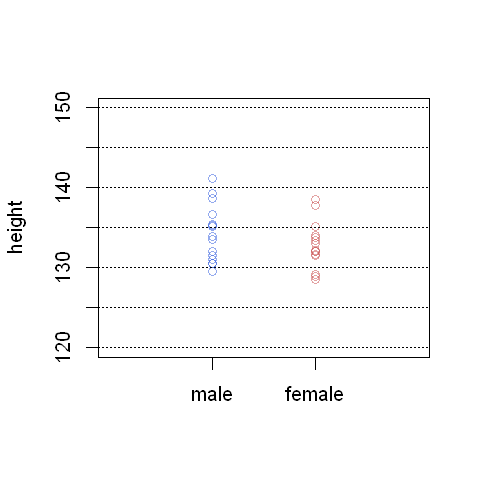

In [3]:
plot(c(rep(1, 15), rep(2, 15)), c(data1.m, data1.f), xlim=c(0, 3), ylim=c(120, 150), xlab="", ylab="height", xaxt="n",
     col = c(rep("#4169E190", 15), rep("#CD5C5C90", 15)))
axis(side=1, at=c(1, 2), labels=c("male", "female"))
lines(c(-0.2, 3.2), c(120, 120), lwd=0.5, lty=3)
lines(c(-0.2, 3.2), c(125, 125), lwd=0.5, lty=3)
lines(c(-0.2, 3.2), c(130, 130), lwd=0.5, lty=3)
lines(c(-0.2, 3.2), c(135, 135), lwd=0.5, lty=3)
lines(c(-0.2, 3.2), c(140, 140), lwd=0.5, lty=3)
lines(c(-0.2, 3.2), c(145, 145), lwd=0.5, lty=3)
lines(c(-0.2, 3.2), c(150, 150), lwd=0.5, lty=3)

In [4]:
mean(data1.m)

[1] 134.3

In [5]:
mean(data1.f)

[1] 132.8

In [6]:
abs(mean(data1.m) - mean(data1.f))

[1] 1.5

平均身長は男子＝134.3 cm、女子＝132.8 cm

この1.5 cmの差をもって、“全国の小学4年生の男子の平均身長は女子より高い”と結論を下して良いだろうか？

6年1組の身長を調査した結果、

In [7]:
data2.m <- c(138.4, 138.9, 142.8, 143.2, 144.0, 144.1, 144.4, 144.6, 144.8, 145.8, 146.2, 146.7, 147.0, 148.6, 149.5)
data2.f <- c(142.3, 142.4, 143.4, 144.0, 144.3, 145.6, 145.9, 147.7, 147.9, 148.6, 149.2, 149.7, 151.6, 151.9, 152.0)
(data2 <- data.frame(male = data2.m, female = data2.f))

male,female
138.4,142.3
138.9,142.4
142.8,143.4
143.2,144.0
144.0,144.3
144.1,145.6
144.4,145.9
144.6,147.7
144.8,147.9
145.8,148.6


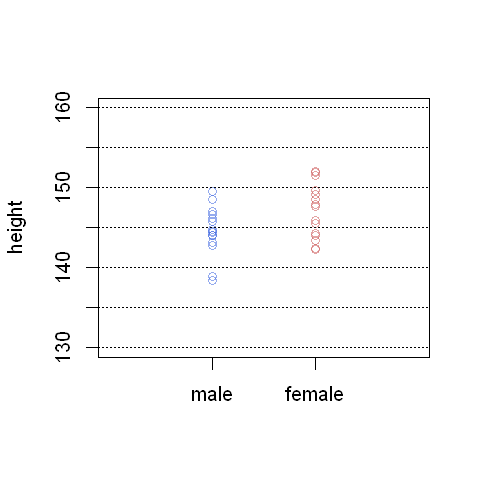

In [8]:
plot(c(rep(1, 15), rep(2, 15)), c(data2.m, data2.f), xlim=c(0, 3), ylim=c(130, 160), xlab="", ylab="height", xaxt="n",
     col = c(rep("#4169E190", 15), rep("#CD5C5C90", 15)))
axis(side=1, at=c(1, 2), labels=c("male", "female"))
lines(c(-0.2, 3.2), c(130, 130), lwd=0.5, lty=3)
lines(c(-0.2, 3.2), c(135, 135), lwd=0.5, lty=3)
lines(c(-0.2, 3.2), c(140, 140), lwd=0.5, lty=3)
lines(c(-0.2, 3.2), c(145, 145), lwd=0.5, lty=3)
lines(c(-0.2, 3.2), c(150, 150), lwd=0.5, lty=3)
lines(c(-0.2, 3.2), c(155, 155), lwd=0.5, lty=3)
lines(c(-0.2, 3.2), c(160, 160), lwd=0.5, lty=3)

In [9]:
mean(data2.m)

[1] 144.6

In [10]:
mean(data2.f)

[1] 147.1

In [11]:
abs(mean(data2.m) - mean(data2.f))

[1] 2.5

平均身長は男子＝144.6 cm、女子＝147.1 cm

“全国の小学6年生の女子の平均身長は男子より高い”と結論を下して良いだろうか？

実は全国平均のデータは文部科学省による全数調査によって得られており、

平成25年度の小学4年生の全国平均は男子女子ともに133.6 cmで差がなく、

小学6年生は男子＝145.0 cm、女子＝146.8 cm

6年1組のデータからは全国平均において**女子のほうが男子よりも身長が高い**、と結論付けるのが正しい判断である

4年生の1.5の差は、たまたまその男子15人の中に身長の高い生徒が選ばれ、女子15人の中に身長の低い女子が選ばれたことによる

一方、小学校6年の身長の差2.5は、偶然のばらつきだけでなく女子の方が高いという効果が入っている

では、いったい平均値の差がどの程度あれば、差があるとみなせるだろうか？  
そのためには、データのばらつきの度合い（＝分散）に注目し、平均値の差が偶然のばらつきからどの程度起こりうるかを検証することで、全体の傾向を推し量る

統計的検定法は、基本的にこの二つの記述統計量（平均、ばらつき＝分散）から成り立つ

## 1・3　統計学を学ぶ大切さ：推定・検定・予測

統計学の手法はおおまかには推定、検定、予測の三つに分けられる

1）**推定**：平均、分散（ばらつき）、95%信頼区間など、手持ちのデータセットをもとに、母集団（population）の基本統計量を定量的に推測する

2）**検定**：平均値などに差があるか否かをテストして判断する

3）**予測**：座標表面で、X軸とY軸の二つのデータセットからその間の関係性を定量化したり、最ももっともらしい関数を求め、そこからX軸の値からY軸の最適な予測値を求める

もちろん、この三つは相互に連携し入り混じっている

回帰分析の線形モデルは、分散分析と同一の統計解析となる。これは以下のような右辺の説明変数の関数から、左辺の応答変数の予測を得る図式にまとめられる。

 **$$応答変数の予測　←　関数f（説明変数＋誤差）$$**

これが統計モデルの一般的形式である。念頭に置いてもらいたい

## 第1章おしまい

## しばし休憩